# Exercise session #3 - $k$-NN Classifier 

In this exercise you will implement  the **$k$-Nearest Neighbor classifier ($k$-NN)**. You will also get familiar with
other very important concepts related to machine learning in practice,
including data preprocessing, distance metrics, visualization, and model evaluation.

We have provided general functionality and pointers for you here. Please complete the code with your own implementation below. Please also discuss and answer the follow-up questions.

### 1. Dataset and problem description

The Healthy Body dataset contains body measurements acquired from **1250 people _from different ages, genders, and nationalities_** from different hospitals around the world. Health professionals have performed medical examinations and classified the individuals into three different body categories: **underweight, normal weight, and overweight.**

Our goal is to automate the role of the health professionals i.e, to predict the category of the new data . However, due to anonymity reasons, we have been provided access to limited information about the individuals: their measured _weights_ and _heights_, and their respective _body category_ only.

We will use these features to train a $k$-NN classifier for the task.

---

In [2]:
# Enable interactive plots, so you can zoom/pan/resize plots
%matplotlib notebook

# Libraries for numerical handling and visualization. Install if required
import numpy as np
from matplotlib import pyplot as plt

## 2. Data loading and visualization

The goal of supervised classification algorithms such as $k$-NN is to use information from a set of labeled examples, i.e., examples for which we know their class assignments, to infer the classes for unlabeled examples.

In [3]:
# Data loading

# Paths
features_annotated_path = "hbody_feats_annotated.npy"     # Weights, heights of individuals with known body category
labels_annotated_path = "hbody_labels_annotated.npy"      # Body categories of those individuals
features_unannotated_path = "hbody_feats_unannotated.npy" # Weights and heights of unknown body category individuals
                                                          # - Goal: Figure out their body categories

# Features organized in an NxD matrix; N examples, D features.
# Another way to look at it: each of the N examples is a D-dimensional feature vector.

features_annotated = np.load(features_annotated_path)
features_unannotated = np.load(features_unannotated_path)
labels_annotated = np.load(labels_annotated_path)

class_names = ('Underweight', 'Normal weight', 'Overweight')


**Q. What are the target variables? What are the predictor variables?**  

<IPython.core.display.Javascript object>


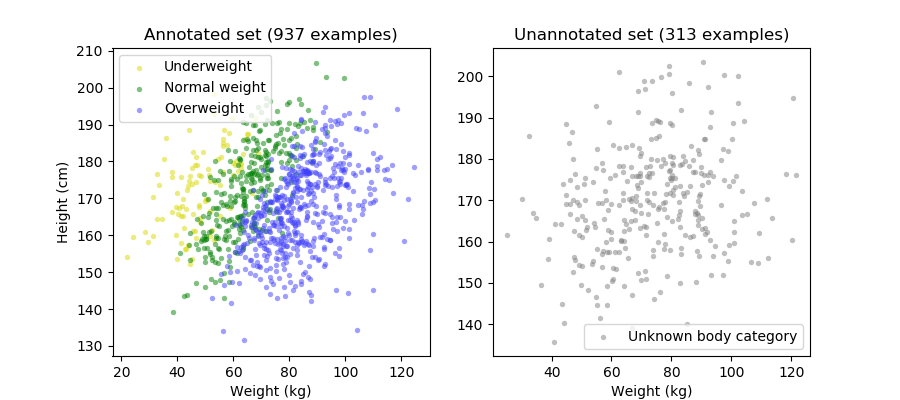

In [4]:
# Visualize annotated and unannotated sets

colors = np.array([[0.85, 0.85, 0], [0, 0.5, 0], [0.25, 0.25, 1]])

plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.title(f"Annotated set ({len(labels_annotated)} examples)")
for i, class_name in enumerate(class_names):
    plt.scatter(*features_annotated[labels_annotated==i].T,
                c=colors[i, None], alpha=0.5, s=15, lw=0, label=class_name)
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.legend();

plt.subplot(1,2,2)
plt.title(f"Unannotated set ({len(features_unannotated)} examples)")
plt.scatter(*features_unannotated.T, c='gray', alpha=0.5, s=15, lw=0, label='Unknown body category')
plt.xlabel("Weight (kg)")
plt.legend();

**Q. Do you think this is an easy or a difficult classification problem? Why?**  

**Q. What should the unannotated set share in common with the annotated set?**  


### 2.1 Normalizing data

$k$-NN determines neighbors by computing the "distance" between two examples. For this process to work, we are required
to normalize the features. This is true for many other machine learning algorithms as well.



A very common way to normalize the data is by the so-called z-score standardization. It transforms values from an arbitrary range such that the result has mean $0$ and standard deviation $1$. The operation is defined as follows:

$$
x_{norm} = \frac {x - \mu_x} {\sigma_x},
$$
for _each feature independently_.

**Q. What would happen if we don't normalize the data?**  


In [5]:
# Normalize the data.
# Tip: Use numpy's broadcasting to write your normalization function

def normalize(features, means, stds):
    # WRITE YOUR CODE HERE
    # return the normalized features
    return (features - means) / stds

# test normalization
dummy_features = np.random.randint(100,size=(10,3))
norm_dummy_features = normalize(dummy_features,dummy_features.mean(0,keepdims=True),dummy_features.std(0,keepdims=True))
if np.allclose(norm_dummy_features.mean(axis=0), 0) and np.allclose(norm_dummy_features.std(axis=0), 1):
    print("Everything alright here.")
else:
    print("Nope. Try again.")

Everything alright here.


## 4. The $k$-Nearest Neighbors Classifier

$k$-NN assigns as label to a given example the most popular label from its surroundings. The method is very intuitive, and can be summarized as:
- Compute the distance between the example to classify and all the training examples.
- Select the closest $k$ training examples.
- Assign to the example the most common label among those neighbors.

### 4.1 Distance metrics

There are many ways to define a distance between two examples. Two very common ones that we will use in this exercise are:

#### Euclidean distance:

$$
m(\mathbf{v}, \mathbf{w}) = \sqrt{ \sum_{i=1}^d \left(\mathbf{v}_i - \mathbf{w}_i\right)^2 }
$$

This is the generalization of the Pythagorean theorem to an arbitrary number of dimensions, and corresponds to our intuitive interpretation of the straight-line distance between two points.

#### Manhattan distance:

$$
m(\mathbf{v}, \mathbf{w}) = \sum_{i=1}^d |\mathbf{v}_i - \mathbf{w}_i|
$$

Aggregates differences in features independently from one another. It is also known as city block distance. One can think of it as the minimum distance one would have to walk between two intersections in a city organized by regular blocks.


**Q. Would you expect to find the same nearest neighbors to a point with both distance metrics?**  


In [ ]:
# Define a function to compute the euclidean distance between a vector and a collection of vectors (matrix)
# Tip: numpy's broadcasting allows you to write this in a very intuitive and simple way.

# example is a vector and training examples a matrix
def euclidean_dist(example, training_examples):
    # WRITE YOUR CODE HERE
    return 

In [8]:
# Define a function to compute the manhattan distance between a vector and a collection of vectors (matrix)
# Tip: numpy's broadcasting allows you to write this in a very intuitive and simple way.

# example is a vector and training examples a matrix
def manhattan_dist(example, training_examples):
    # WRITE YOUR CODE HERE
    return 

In [7]:
# Find the indices of the k shortest distances from a list of distances
#Tip: use np.argsort()

def find_k_nearest_neighbors(k, distances):
    indices = np.argsort(distances)[:-k]
    return indices

# test k nearest neighbors
dummy_distances = [10.,0.5,200,0.006,43,4.5,11.,50]
top_k = 5
top_k_indices = find_k_nearest_neighbors(top_k,dummy_distances)

if np.allclose(top_k_indices,[3,1,5,0,6]):
    print('Implementation is correct')
else:
    print('Oops!! Something is wrong')
        

ValueError: operands could not be broadcast together with shapes (3,) (5,) 

In [ ]:
# Given a list of neighbor labels, choose the most frequent one.
# Tip: np.bincount and np.argmax are your friend.

def predict_label(neighbor_labels):
    # WRITE YOUR CODE HERE
    return 

# test label prediction
dummy_labels = [10,3,2,10,2,2,2,10,10,11,1,2]
if predict_label(dummy_labels) == 2:
    print('Implementation is correct')
else:
    print('Oops!! Something is wrong')


### 4.2 $k$-NN Step by Step for a Single Example
Let's implement the algorithm for one example in this section. **Try out different values of k and observe the changes.**

**Q. What do we use as mean and std to normalize our unknown sample? and Why?**  


In [ ]:
# Use the function you just defined to predict the label of a example

# Choosing a random training example and treating as we don't know it's true label. 
total_samples = features_annotated.shape[0]
dummy_unknown = np.random.choice(np.arange(total_samples),1)[0]
all_indices = np.arange(total_samples)
known_label = np.delete(all_indices,dummy_unknown)

# Get the features corresponding to known and unknown points
train_labels = labels_annotated[known_label]
train_feats = features_annotated[known_label,:]
dummy_unknown_feats =  features_annotated[dummy_unknown,:]

# IMPORTANT: Normalize the data, what should be the mean and std?
# WRITE YOUR CODE HERE
mean_val = 
std_val = 
norm_train_feats = normalize(train_feats,mean_val,std_val)
norm_dummy_unknown_feats = normalize(dummy_unknown_feats,mean_val,std_val)

# choose number of neighbors
k=6

# find distance w.r.t all training examples
distances = euclidean_dist(norm_dummy_unknown_feats, norm_train_feats)
# find the nearest neighbors
nn_indices = find_k_nearest_neighbors(k, distances)
# find labels of nearest neighbors
neighbor_labels = train_labels[nn_indices] 
# find the best label
best_label = predict_label(neighbor_labels) 

print(f'Predicted label: {class_names[best_label]}')

In [ ]:
# Visualize the unknown point and its neighbors.
plt.figure()
plt.title(f"A randomly chosen unlabeled example from the validation set\nand its {k}-nearest neighbors")
for i, class_name in enumerate(class_names):
    plt.scatter(*norm_train_feats[train_labels==i].T,
                c=colors[i, None], alpha=0.25, s=15, lw=0, label=class_name)
for i, class_name in enumerate(class_names):
    class_indices = nn_indices[train_labels[nn_indices] == i]
    if len(class_indices) > 0:
        plt.scatter(*norm_train_feats[class_indices].T,
                    c=colors[i, None], alpha=1, s=25, lw=0, label='Neighbor')

ax = plt.scatter(*norm_dummy_unknown_feats[0], marker='*', c='brown', alpha=0.5, s=50, label='unlabeled example')
plt.xlabel("Weight (normalized)")
plt.ylabel("Height (normalized)")
plt.gca().set_aspect('equal')
plt.legend();

### 4.3 Putting things together

In [ ]:
# Write a function kNN_one_example that applies all the previous steps
# to predict the label of one example.

def kNN_one_example(unlabeled_example, training_features, training_labels, k):
    # WRITE YOUR CODE HERE
    distances =                 # Compute distances
    nn_indices =                # Find neighbors
    neighbor_labels =           # Get neighbors' labels
    best_label =                # Pick the most common
    
    return best_label

In [ ]:
# Write a function kNN that applies kNN_one_example to an arbitrary number of examples.
# Tip: numpy's apply_along_axis does most of the work for you.

def kNN(unlabeled, training_features, training_labels, k):
    # WRITE YOUR CODE HERE
    return

**Q. While the above implementation works, it has some drawbacks. Can you identify them?**  

**Q. Can you think of a better implementation?**  


## 5 Cross Validation

### 5.1 Splitting the annotated data into training, validation, and test sets

We need to ensure that our method generalizes, which means it will correctly predict the class for new provided examples.

In order to simulate this scenario, we will split our annotated data into two groups: the training set, and the test set.
- The **training set** will be used for finding a set of parameters and hyperparameters minimizing a given criterion.
- The **test set** will be used for testing how well the learned model generalizes to data beyond that used for training.

While the training set helps us find out how exactly to manipulate our data to find the right prediction, the test set tells us how well we expect to perform when given new data. Our training procedure is allowed to handle data from the training set only, and should not in any way use the information from the test set.

In [ ]:
# Split labeled data into training and test set

# Choose a fixed seed to reproduce same results
np.random.seed(330)

num_annotated_labels = len(labels_annotated)

# percentage of annotated data for train and test sets. 
# what will be the implications of choosing different ratios of train and test?
training_perc, test_perc = 0.8, 0.2

indices = np.arange(len(labels_annotated))
np.random.shuffle(indices)

num_train_samples = int(training_perc*num_annotated_labels)
num_test_samples = num_annotated_labels-num_train_samples

# split indices into train and test folds
training_indices, test_indices = np.split(indices,indices_or_sections=[num_train_samples])

# Get the training and test data and labels
training_features = features_annotated[training_indices]
training_labels = labels_annotated[training_indices]
test_features = features_annotated[test_indices]
test_labels = labels_annotated[test_indices]

In [ ]:
# Normalize the features of train and test data with mean 0 and std 1
# WRITE YOUR CODE HERE
mean_features = 
std_features = 
norm_train_features = normalize(training_features,mean_features,std_features)
norm_test_features = normalize(test_features,mean_features,std_features)


### 5.2 K-Fold Cross-validation

If we are only allowed to assess our model generalization _after_ training, how can we monitor and guide the training process? How can we know beforehand that we are using the best version of our model?

The most common strategy for this, called **[cross validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics))**, is, simply put, to pretend that a part of our training data is in fact unannotated, and see if our method manages to predict the annotations correctly. In other words, we will reserve a portion of our training data to temporarily act as a small test set. 

Cross Validation(CV) technique is used to choose the best parameters for separate validation set, where the hope is that this set will be close to the (unseen) test set. We train our model on train set and use hyperparameters which give best results on validation set. This is a general technique to choose your best machine learning model.

K-fold is a type of CV technique that we'll see here. We'll split data in K parts and use kth part for validation, whereas k-1 for training. This process will be repeated K times. Metric used to evaluate the model is accuracy on the validation set.

Splitting your training data into a training and a validation set is also used for comparing different "versions" of your model. Many machine learning methods depend on predefined configuration settings, called _hyperparameters_, that heavily influence how the method behaves. In the case of $k$-NN, one such parameter is $k$, the number of neighbors.

In this exercise, we will be applying k-fold cross validation. Technically, your validation set is part of your training data. To avoid confusion, however, we often call the _training set_ the portion of your training data used for tuning your method. Therefore, for k-fold cross validation, we  split our annotated data into a training data, and a test set. Further, we split the training data into k-folds from which one fold is used for validation set and rest of the folds as training set. This process is repeated K times and average performance is calculated. We choose the value of hyperparameter which minimises the error on the cross-validations set. 


**Q. What is the difference between validation set and test set?**  


In [ ]:
# Function to split data indices

# Inputs:
#        num_examples: total samples in the dataset
#        k_fold: number fold of CV
# 
# Output: array of shuffled indices with shape (k_fold, num_examples//k_fold)

def fold_indices(num_examples,k_fold):
    ind = np.arange(num_examples)
    split_size = num_examples//k_fold
     
    k_fold_indices = []

    # WRITE YOUR CODE HERE
    # Generate k_fold set of indices
    k_fold_indices = 
         
    return np.array(k_fold_indices)


**Q. What does `np.random.seed` do? Why is this useful?**  



### 5.3 Performance metric to know if the  prediction is good?

In order to quantify the performance of our model, we want to obtain a score that tells us how close the predictions were to the expected classification.

The simplest way to do this is to compute the ratio of correctly predicted examples, also known as the accuracy:

$$
\frac 1 N \sum_{n=1}^N \mathbf{1}[\hat{y} = y]
$$
**Q. Do you see any limitation to using accuracy to evaluate your model?**



**Q. Can you think of other ways to evaluate your model?**


**Q. Is accuracy suitable for multiclass classification?**  

**Q. What other criteria, aside from accuracy, should one consider when choosing hyperparameters?**  



In [ ]:
# Write a function that computes the accuracy between a predicted and the expected labels.
def accuracy(predicted, target):
    # WRITE YOUR CODE HERE
    return 

In [ ]:
# kNN function using kth split as validation set and rest k-1 splits to train model. 

#Inputs:
#   k - kth fold as cross validation split
#   k_fold_ind -  indices of each split of k-fold split
#   X  -  training data
#   Y  - train labels
#   NN - number of nearest neighbours for k-NN algorithm

#Outputs:  return the accuracy of validation set

def kNN_CV(k_fold,k_fold_ind,X,Y,k ):
    
    #use kth split for validation
    val_ind = k_fold_ind[k_fold]
    
    # use rest k-1 splits to train
    train_splits = [i for i in range(k_fold_ind.shape[0]) if i is not k_fold]
    train_ind = k_fold_ind[train_splits,:].reshape(-1)
    
    #Get train and val 
    X_train = X[train_ind,:]
    Y_train = Y[train_ind]
    X_val = X[val_ind,:]
    Y_val = Y[val_ind]
    
    
    Y_val_pred = kNN(X_val, X_train, Y_train, k)
    
    #get accuracy for val
    acc = accuracy(Y_val_pred, Y_val)
    return acc

### 5.4 Putting it all together

In [ ]:
# Perform a 4-fold cross validation on training dataset

k =  4  # number of nearest neighbours for k-NN
k_fold = 4
k_fold_ind = fold_indices(norm_train_features.shape[0],k_fold)
acc = np.zeros(k_fold)
for fold in range(k_fold):
    # Get validation accuracy with kth fold as validation set and rest as training set
    # WRITE YOUR CODE HERE
    acc[fold] = kNN_CV(...)
mean_acc = 

print(f"{k}-NN Classifier predicted correctly  with accuracy of {mean_acc:.2%} on cross-validation set")


**Q. How should one select the number of folds of the cross-validation set?**  



### 5.5 Hyperparameter optimization

Did we choose the best $k$?

We can evaluate our model under different values of $k$ to compare them. A simple way to do it is to evaluate our model's predictions for the same validation set when using different values of $k$.


In [ ]:
# Call the CV with different k values

def run_cv_for_hyperparam(k_values, k_fold,norm_train_features,training_labels):

    k_fold_ind = fold_indices(norm_train_features.shape[0],k_fold)
    model_performance = []  # Store the computed metrics here
    for k in k_values:
        for fold in range(k_fold):
            # WRITE YOUR CODE HERE
            acc[fold] = kNN_CV(...)
        mean_acc = 
        model_performance.append(mean_acc)
        
    return model_performance


In [ ]:
# Visualize the performances for different values of k

k_values = range(1, 30)          # Try different values for hyperparameter k
k_fold = 4
model_performance= run_cv_for_hyperparam(k_values,k_fold,norm_train_features,training_labels)

plt.figure(figsize=(9,4))
plt.title("Performance on the validation set for different values of $k$")
plt.plot(k_values, model_performance)
plt.xlabel("Number of nearest neighbors $k$")
plt.xticks(k_values)
plt.ylabel("Performance (accuracy)");

In [ ]:
# Pick hyperparameter value that yields the best performance
# WRITE YOUR CODE HERE
best_k = 

print(f"Best number of nearest neighbors on validation set is k={best_k}")

**Q. How do you expect the model to perform with large k values equal to number of training example ?**



In [ ]:
# Visualize the performances for different values of k

k_values = range(1, 500, 30)          # Try different values for hyperparameter k
k_fold = 4
model_performance= run_cv_for_hyperparam(k_values,k_fold,norm_train_features,training_labels)

plt.figure(figsize=(9,4))
plt.title("Performance on the validation set for different values of $k$")
plt.plot(k_values, model_performance)
plt.xlabel("Number of nearest neighbors $k$")
plt.xticks(k_values)
plt.ylabel("Performance (accuracy)");
    

### 5.6 Does your final model generalize to Unseen test data?

Now that we have tuned our model, we can apply it for prediction on the test set using the optimal $k$ found on cross-validations set.

**Q. How do you expect the model to perform, compared with the cross-validation set performance?**



In [ ]:
# get the labels on the test-set using the best k value after CV
# WRITE YOUR CODE HERE
predicted_test_labels = kNN(...)

In [ ]:
# Visualize the predictions on the test set

plt.figure()
plt.title("Predicted classes for the test set")
for i, class_name in enumerate(class_names):
    plt.scatter(*norm_train_features[training_labels==i].T,
                c=colors[i, None], alpha=0.1, s=15, lw=0)
for i, class_name in enumerate(class_names):    
    plt.scatter(*norm_test_features[predicted_test_labels==i].T,
                c=colors[i, None], marker='*', alpha=0.5, s=50, lw=0, label=class_name)
plt.gca().set_aspect('equal')
plt.xlabel("Weight (normalized)")
plt.ylabel("Height (normalized)")
plt.legend();

In [ ]:
performance = accuracy(test_labels, predicted_test_labels)
print(f"{best_k}-NN Classifier predicted correctly {performance:.2%} of the test examples.")

**Q. Was this the value you were expecting?**



## 6. Predicting on unannotated data

We are finally ready to apply our model for prediction on unannotated data.

In [ ]:
# Data loading and preparation for unannotated data
features_unannotated = np.load(features_unannotated_path)
# WRITE YOUR CODE HERE
norm_features_unannotated = 

**Q. What should one take into account when feeding new data to a machine learning model?**



In [ ]:
# Get predicted labeles for unannotated data.
# WRITE YOUR CODE HERE
predicted_labels_unannotated = kNN(..)

In [ ]:
# Visualize the predictions on the unannoated set

plt.figure()
plt.title("Predicted classes for unannotated data")
for i, class_name in enumerate(class_names):
    plt.scatter(*norm_train_features[training_labels==i].T,
                c=colors[i, None], alpha=0.1, s=15, lw=0)
for i, class_name in enumerate(class_names):    
    plt.scatter(*norm_features_unannotated[predicted_labels_unannotated==i].T,
                c=colors[i, None], marker='*', alpha=0.5, s=50, lw=0, label=class_name)
plt.gca().set_aspect('equal')
plt.xlabel("Weight (normalized)")
plt.ylabel("Height (normalized)")
plt.legend();

**Q. Do these class assignments look reasonable to you?**  



**Q. How would you evaluate if your predictions are reasonable here, without labels?**  
